In [3]:
# Versão da Linguagem Python.
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [4]:
# Importando a biblioteca Pandas.
import pandas as pd

In [5]:
# Carregando o conjunto de dados.
df = pd.read_excel('C:/Users/sarap/Downloads/camelo2.xlsx')

In [6]:
# Visualizando o DataFrame.
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,NaN,2.0,2.0,1.0,42.0,1.0,-1.0,-1.0,-1.0,...,590.0,590.0,590.0,0.0,590.0,315.0,590.0,590.0,0.0,0.0
1,2.0,NaN,2.0,2.0,2.0,44.0,3.0,4.0,-1.0,5.0,...,550.0,550.0,550.0,0.0,0.0,295.0,0.0,0.0,0.0,1.0
2,3.0,NaN,2.0,2.0,2.0,40.0,5.0,1.0,3.0,3.0,...,1100.0,1100.0,1100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,NaN,2.0,2.0,1.0,36.0,-1.0,2.0,3.0,-1.0,...,1140.0,1140.0,1140.0,1140.0,0.0,0.0,1140.0,1140.0,1140.0,0.0
4,5.0,NaN,1.0,2.0,1.0,49.0,-1.0,-1.0,2.0,-1.0,...,550.0,550.0,550.0,550.0,550.0,0.0,550.0,550.0,550.0,0.0


In [11]:
# Importando as biblioteca para plotagens gráficas.
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# Importando o Numpy.
import numpy as np

# Importando as classes dos algoritmos usados.
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importando a classe para balanceamento dos dados.
from imblearn.over_sampling import SMOTE

# Importando a classe para normalização dos dados.
from sklearn.preprocessing import MinMaxScaler

# Importando a classe para criação do Pipeline.
from sklearn.pipeline import Pipeline

# Importando as classes para avaliação do desempenho dos modelos.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, plot_roc_curve

# Importando a classe da validação cruzada.
from sklearn.model_selection import cross_validate, StratifiedKFold

# Importando a classe para detectar os melhores hiperparâmetros.
from sklearn.model_selection import RandomizedSearchCV

# Importando a classe para divisão dos dados em treino/teste.
from sklearn.model_selection import train_test_split

# Importando a classe para detecção de multicolinearidade.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importando a classe para realizar o Teste FANOVA.
from sklearn.feature_selection import f_classif

ModuleNotFoundError: No module named 'xgboost'

In [12]:
# Criando um novo DataFrame contendo valores booleanos.
df_zero_mask = df == 0

In [14]:
# Criando uma série booleana.
freature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [15]:
# Calculando a soma da série booleana.
sum(freature_zero_mask)

0

In [16]:
# Novo DataFrame apenas com dados válidos.
df_clean_1 = df.loc[~freature_zero_mask,:].copy()

In [21]:
# Contagens de valores da variável "SEX".
df_clean_1['SEX'].value_counts()

2.0    16
1.0     9
Name: SEX, dtype: int64

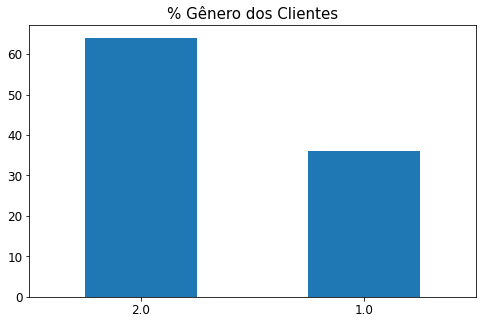

In [22]:
# Porcentagem por gênero.
sex_cnt = (df_clean_1['SEX'].value_counts(normalize=True)*100)
sex_cnt.plot.bar(figsize=(8,5))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("% Gênero dos Clientes", fontsize=15);

In [23]:
# Contagem de valores da coluna "EDUCATION".
df_clean_1['EDUCATION'].value_counts()

2.0    10
1.0    10
3.0     5
Name: EDUCATION, dtype: int64

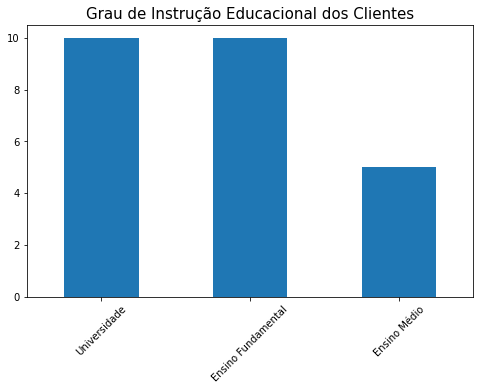

In [40]:
# Visualização da variável "EDUCATION".
fig, ax = plt.subplots(figsize=(8,5))
df_clean_1['EDUCATION'].replace({1:'Ensino Fundamental', 2:'Universidade', 
                                 3:'Ensino Médio', 4:'Outros'}).value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Grau de Instrução Educacional dos Clientes", fontsize=15);
plt.show()

In [26]:
# Contagem de valores da coluna "MARRIAGE".
df_clean_1['MARRIAGE'].value_counts()

2.0    15
1.0     9
3.0     1
Name: MARRIAGE, dtype: int64

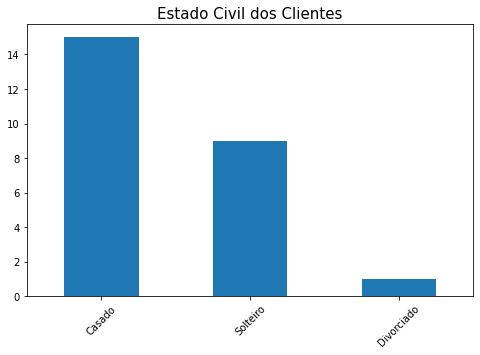

In [41]:
# Visualização da variável "MARRIAGE".
fig, ax = plt.subplots(figsize=(8,5))
df_clean_1['MARRIAGE'].replace({1:'Solteiro', 2:'Casado', 
                                 3:'Divorciado'}).value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Estado Civil dos Clientes", fontsize=15);
plt.show()

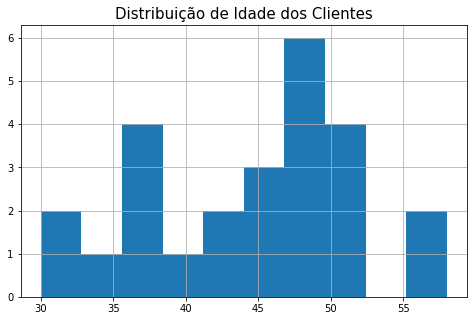

In [29]:
# Histograma da variável "LIMIT_BAL".
df_clean_1[['AGE']].hist(figsize=(8,5))
plt.title('Distribuição de Idade dos Clientes', fontsize=15);

In [30]:
# Informações estatísticas da variável.
df_clean_1[['AGE']].describe()

,AGE
count,25.000000
mean,44.400000
std,7.494442
min,30.000000
25%,38.000000
50%,46.000000
75%,49.000000
max,58.000000


In [31]:
# Obtendo informações da variável.
df_clean_1[['PAY_0']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PAY_0   25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes


In [32]:
# Contagem de valores da "PAY_0.
df_clean_1['PAY_0'].value_counts()

-1.0    13
 1.0     3
 3.0     3
 2.0     3
 6.0     2
 5.0     1
Name: PAY_0, dtype: int64

In [33]:
# Criando uma máscara booleana com os valores diferentes de "Not available".
valid_pay_1_mask = df_clean_1['PAY_0'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_0, dtype: bool

In [34]:
# Calculando a soma da máscara.
sum(valid_pay_1_mask)

25

In [35]:
# Criando um novo DataFrame excluindo as linhas "Not available".
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [36]:
# Examinando o novo DataFrame.
df_clean_2.shape

(25, 25)

In [37]:
# Convertendo o tipo de dados da coluna "PAY_1".
df_clean_2['PAY_0'] = df_clean_2['PAY_0'].astype('int64')

# Verificando a conversão.
df_clean_2[['PAY_0']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_0   25 non-null     int64
dtypes: int64(1)
memory usage: 400.0 bytes


In [38]:
# Taxa de inadimplência.
overall_default_rate = df_clean_2['default payment next month'].mean()
overall_default_rate

0.36

In [39]:
# Média da variável de resposta por classe de "PAY_0".
group_by_pay_mean_y = df_clean_2.groupby('PAY_0').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_0,
-1,0.153846
1,0.666667
2,0.000000
3,1.000000
5,1.000000
6,0.500000


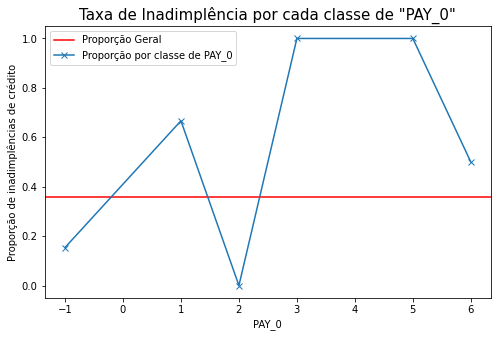

In [42]:
# Taxa de Inadimplência por cada classe de "PAY_0".
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes, figsize=(8,5))
axes.set_title('Taxa de Inadimplência por cada classe de "PAY_0"', fontsize=15)
axes.set_ylabel('Proporção de inadimplências de crédito')
axes.legend(['Proporção Geral', 'Proporção por classe de PAY_0']);

In [43]:
# Criando uma lista com as variáveis de status de pagamentos.
pay_feats = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_feats

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [44]:
# Estatísticas das variáveis.
df_clean_2[pay_feats].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.880000,0.760000,1.280000,0.920000,-0.240000,0.280000
std,2.350886,2.350177,2.508652,2.767671,1.665333,2.072036
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
75%,2.000000,2.000000,3.000000,3.000000,-1.000000,2.000000
max,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000


In [45]:
# Contagem de valores da "PAY_0".
df_clean_2[pay_feats[0]].value_counts().sort_index()

-1    13
 1     3
 2     3
 3     3
 5     1
 6     2
Name: PAY_0, dtype: int64

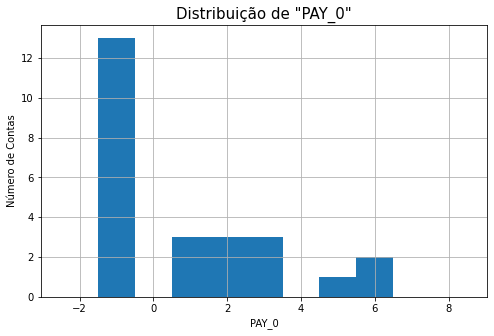

In [46]:
# Histograma da variável "PAY_0".
pay_1_bins = np.array(range(-2,10)) - 0.5
df_clean_2[pay_feats[0]].hist(bins=pay_1_bins, figsize=(8,5))
plt.title('Distribuição de "PAY_0"', fontsize=15)
plt.xlabel('PAY_0')
plt.ylabel('Número de Contas');

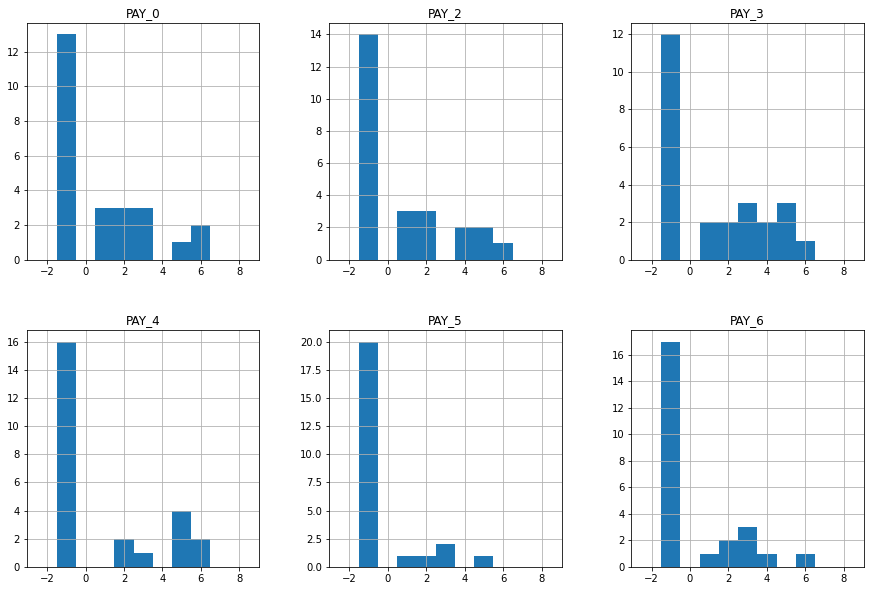

In [50]:
# Plotagens das variáveis.
df_clean_2[pay_feats].hist(bins=pay_1_bins, layout=(2,3), figsize=(15,10));

In [51]:
# Comparando as variáveis.
df_clean_2.loc[df_clean_2['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
3,2.0,3.0
15,2.0,5.0
18,2.0,1.0


In [53]:
# Lista com os nomes das variáveis.
bill_feats = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5', 'BILL_AMT6']

In [54]:
# Visualizando a conversão.
df_clean_2[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5', 'BILL_AMT6']]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,590.0,590.0,315.0,590.0,590.0,590.0
1,550.0,550.0,295.0,550.0,550.0,550.0
2,1100.0,1100.0,1100.0,1100.0,1100.0,1100.0
3,1140.0,1140.0,610.0,1140.0,1140.0,1140.0
4,550.0,550.0,295.0,550.0,550.0,550.0
5,550.0,550.0,295.0,550.0,550.0,550.0
6,1180.0,1180.0,630.0,1180.0,1360.0,500.0
7,920.0,920.0,920.0,920.0,920.0,1100.0
8,550.0,550.0,295.0,550.0,550.0,550.0
9,550.0,550.0,295.0,550.0,550.0,550.0


In [55]:
# Convertendo o tipo dos dados da variável.
df_clean_2[bill_feats] = df_clean_2[bill_feats].astype('int64')

In [56]:
# Estatísticas das variáveis.
df_clean_2[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,999.200000,999.000000,630.800000,999.200000,1004.800000,977.600000
std,447.361897,447.572154,368.175909,447.361897,453.423275,458.541892
min,550.000000,545.000000,295.000000,550.000000,550.000000,500.000000
25%,590.000000,590.000000,315.000000,590.000000,550.000000,550.000000
50%,1100.000000,1100.000000,590.000000,1100.000000,1100.000000,1100.000000
75%,1180.000000,1180.000000,885.000000,1180.000000,1180.000000,1140.000000
max,2280.000000,2280.000000,1690.000000,2280.000000,2280.000000,2280.000000


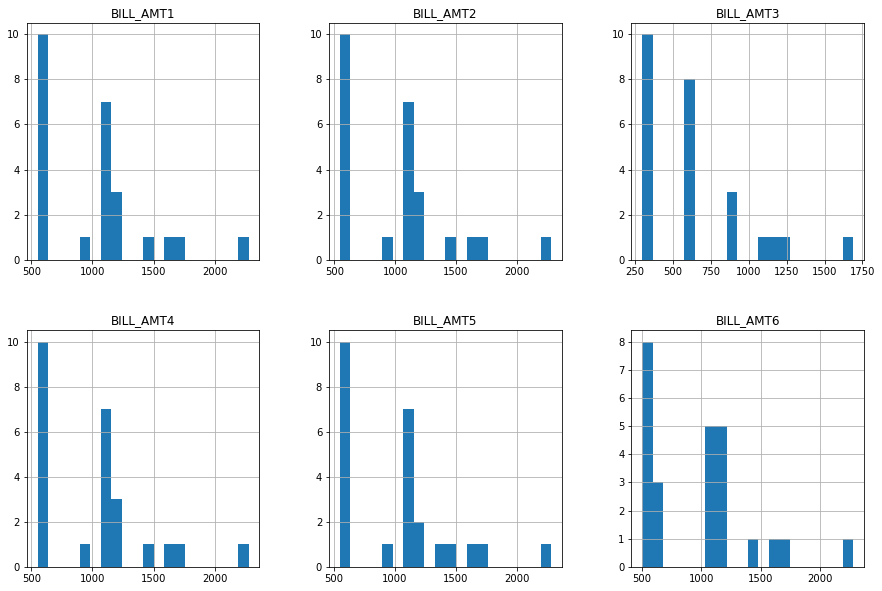

In [57]:
# Plots das variáveis.
df_clean_2[bill_feats].hist(bins=20, layout=(2,3), figsize=(15,10));

In [58]:
# Calculando a média da variável de resposta.
df_clean_2['default payment next month'].mean()

0.36

In [59]:
# Verificando o número de amostras em cada classe.
df_clean_2.groupby('default payment next month') ['ID'].count()

default payment next month
0.0    16
1.0     9
Name: ID, dtype: int64

In [60]:
# Criando uma lista com todas as colunas do DataFrame.
features_response = df_clean_2.columns.tolist()
features_response

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [61]:
# Variáveis descartadas.
items_to_remove = ['ID', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [62]:
# Lista apenas com as variáveis desejáveis.
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [63]:
# Visão geral das variáveis.
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          25 non-null     float64
 1   LIMIT_BAL                   0 non-null      float64
 2   SEX                         25 non-null     float64
 3   EDUCATION                   25 non-null     float64
 4   MARRIAGE                    25 non-null     float64
 5   AGE                         25 non-null     float64
 6   PAY_0                       25 non-null     int64  
 7   PAY_2                       25 non-null     float64
 8   PAY_3                       25 non-null     float64
 9   PAY_4                       25 non-null     float64
 10  PAY_5                       25 non-null     float64
 11  PAY_6                       25 non-null     float64
 12  BILL_AMT1                   25 non-null     int64  
 13  BILL_AMT2                   25 non-nu

In [64]:
# Gravando o DataFrame em um arquivo CSV.
df_clean_2.to_csv('df', index=False)

In [65]:
# Carregando o dataset com os dados tratados.
df = pd.read_csv('df')

In [66]:
# Correlação das variáveis.
corr = df[features_response].corr()

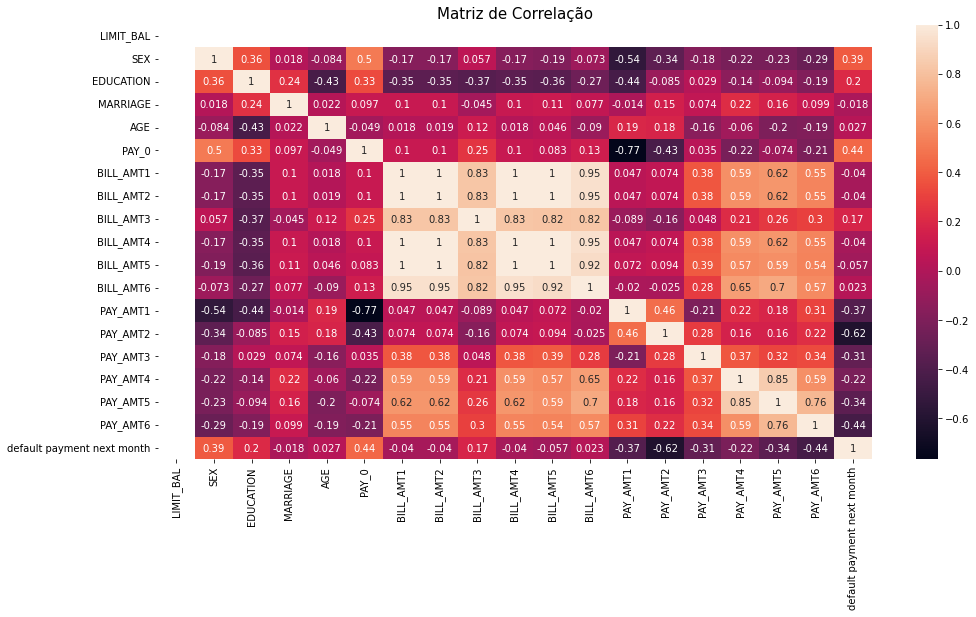

In [69]:
# Matriz de correlação.
plt.subplots(figsize=(16,8))
plt.title('Matriz de Correlação', fontsize=15)
sns.heatmap(corr, annot=True)
plt.show()

In [48]:
# Verificando os tipos de dados das variáveis.
df.dtypes

ID                             float64
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                            float64
PAY_0                          float64
PAY_2                          float64
PAY_3                          float64
PAY_4                          float64
PAY_5                          float64
PAY_6                          float64
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default payment next month     float64
dtype: object

In [70]:
# Convertendo as variáveis para categóricas.
df.SEX = df.SEX.astype("category")
df.EDUCATION = df.EDUCATION.astype("category")
df.MARRIAGE = df.MARRIAGE.astype("category")

In [71]:
# Verificando a conversão.
df.dtypes

ID                             float64
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                            float64
PAY_0                            int64
PAY_2                          float64
PAY_3                          float64
PAY_4                          float64
PAY_5                          float64
PAY_6                          float64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default payment next month     float64
dtype: object

In [72]:
# Verificando os dados da variável de resposta.
df['default payment next month'].value_counts()

0.0    16
1.0     9
Name: default payment next month, dtype: int64

In [73]:
# Separando as variáveis preditoras e a variável de resposta em arrays.
x = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(x.shape, y.shape)

(25, 18) (25,)
